<a href="https://colab.research.google.com/github/matheusmvl01/Airbnb-Paris/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/matheusmvl01/Airbnb-Paris/blob/main/banner%20data%20science.png?raw=true">

*by [Matheus Vasconcelos](https://github.com/matheusmvl01)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
pd.read_csv('https://raw.githubusercontent.com/matheusmvl01/Airbnb-Paris/refs/heads/main/listings.csv')

# definir o df a uma variavel
df_paris = pd.read_csv('https://raw.githubusercontent.com/matheusmvl01/Airbnb-Paris/refs/heads/main/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número para identificar usuário.
* `name` - Nome da hospedagem (anúncio).
* `host_id`- Número para identificar o proprietário (anfitrião) da hospedagem.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Agrupamento de bairros.
* `neighbourhood` - Nome do bairro.
* `latitude` - Latitude da propriedade.
* `longitude` - Longitude da propriedade.
* `room_type` - Informa o tipo da propriedade.
* `price` - Valor da diária da hospedagem.
* `minimum_nights` - Quantidade mínima de noites para reserva.
* `number_of_reviews` - Quantidade de comentários que a propriedade possui.
* `last_review` - Data do último comentário.
* `reviews_per_month` - Quantidade de comentários por mês.
* `calculated_host_listings_count` - Quantidade de hospedagens do mesmo proprietário (anfitrião).
* `availability_365` - Quantidade de dias a hospedagem está disponível por ano.
* `number_of_reviews_ltm` - Quantidade de comentários nos últimos 12 meses.
* `license` - Informa o número de registro da licença do Airbnb.

Obs.: Algumas cidades exigem uma licença dos proprietarios para colocarem suas propriedades a disposição do airbnb.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df_paris.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
df_paris.shape
print('O número de linhas é de:' , df_paris.shape[0])
print('O número de colunas é de:',df_paris.shape[1])
# verificar os tipos de entrada do dataset
df_paris.dtypes

O número de linhas é de: 95461
O número de colunas é de: 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_paris.isnull().sum() / df_paris.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
price,0.327160
reviews_per_month,0.284326
last_review,0.284326
license,0.203717
host_name,0.000063
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


* Foi constatado a coluna `neighbourhood_group` tem **100% dos seus valores ausentes**.
* A coluna `price` tem aproximadamente **33% dos seus valores ausentes**
* As colunas `reviews_per_month`, `last_review` e `license` tem valores ausentes consideráveis, porém não influenciam na análise de dados.



Devido ao alto número de valores ausentes da coluna price, devemos tratar essa coluna separadamente.

In [ ]:
#analisando as 10 primeiras entradas do Dataset
df_paris.price.head(10)

,price
0,185.0
1,250.0
2,85.0
3,NaN
4,110.0
5,300.0
6,NaN
7,NaN
8,155.0
9,63.0


Como podemos ver, já nas 10 primeiras entradas da coluna temos 3 valores ausentes.

In [ ]:
#analisando a coluna price
df_paris.price.describe()

,price
count,64230.000000
mean,256.023276
std,522.272191
min,8.000000
25%,103.000000
50%,155.000000
75%,256.000000
max,30400.000000


In [ ]:
#Descobrindo a moda da coluna price
df_paris.price.mode()


,price
0,150.0


Após analise a *moda* da coluna price é 150.0, valor próximo da mediana que é 155.0.

Neste caso usarei a moda para preenchimeto dos dados ausentes do conjunto de dados.

In [ ]:
#preenchendo os valores ausentes
moda = 150
df_paris = df_paris.fillna({'price': moda})

#verificando os dados
(df_paris.isna().sum() / df_paris.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
reviews_per_month,0.284326
last_review,0.284326
license,0.203717
host_name,0.000063
minimum_nights,0.000000
number_of_reviews_ltm,0.000000
availability_365,0.000000
calculated_host_listings_count,0.000000
number_of_reviews,0.000000


In [ ]:
df_paris.price.describe()

,price
count,95461.000000
mean,221.336724
std,431.280604
min,8.000000
25%,126.000000
50%,150.000000
75%,200.000000
max,30400.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

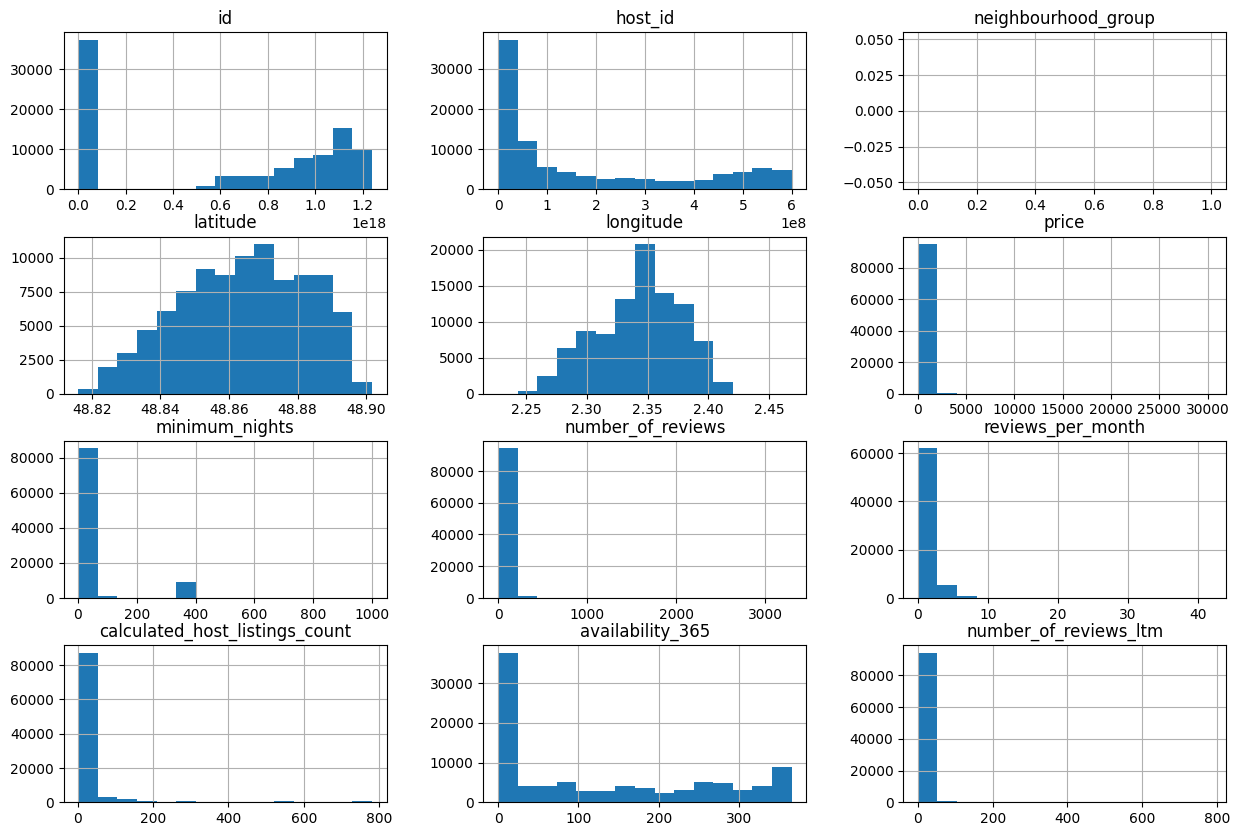

In [ ]:
# plotar o histograma das variáveis numéricas
df_paris.hist(bins=15, figsize=(15,10))

#### Q3.1 Há *outliers* presentes ?

Podemos ver que algumas variáveis estão com outliers, ocasionando discrepância na analise de dados pelos gráficos.

As variáveis `price`, `minimum_nights` e `calculated_host_listings_count` estão com os gráficos discrepantes com a possível realidade.

In [ ]:
#descobrindo possíveis outliers das variaveis "price" e "minimum_nights"
df_paris[['price','minimum_nights']].describe()

,price,minimum_nights
count,95461.000000,95461.000000
mean,221.336724,40.242560
std,431.280604,106.171396
min,8.000000,1.000000
25%,126.000000,2.000000
50%,150.000000,3.000000
75%,200.000000,5.000000
max,30400.000000,1000.000000


Olhando o resumo estatístico das variaveis, podemos afirmar algumas hipoteses como:

* A variável `price` tem seu valor referente ao 75° percentil de 200.00, valor que está muito distante do valor máximo que é de 30400.00, situação que demostra que temos outliers na coluna.
* O valor da média da variável `price` está muito proximo dos 75%.
* O valor máximo da variável `minimum_nights` é de 1000, demonstrando-se um claro outlier.


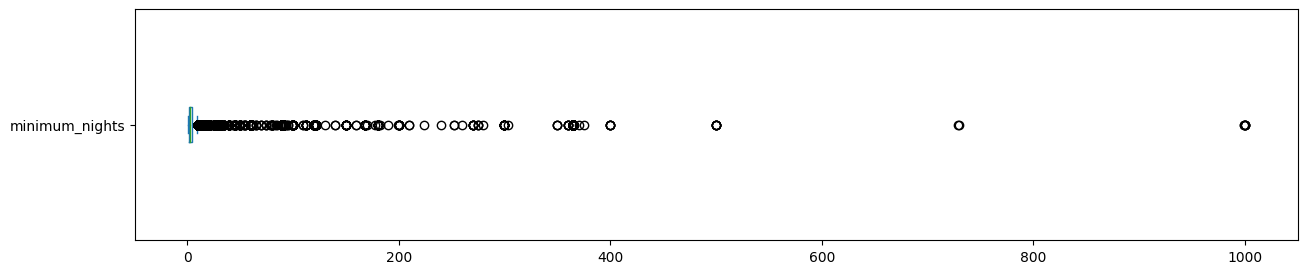

A quantidade de valores acima de 30 na variável minimum_nights é de: 11002
Equivalendo a:  11.525125443898556 %


In [ ]:
#box splot minimum nights
df_paris['minimum_nights'].plot(kind= 'box', vert=False, figsize=(15,3))
plt.show()

#procurando os outliers de minimum nights
print('A quantidade de valores acima de 30 na variável minimum_nights é de:', len(df_paris[df_paris.minimum_nights > 30]))
print('Equivalendo a: ',(len(df_paris[df_paris.minimum_nights > 30]) / df_paris.shape[0])*100, '%')

Mesmo sabendo que 11.52% dos dados da coluna minimum_nights são valores de extrema relevância e não deveriamos excluir tamanha proporção de dados, não tive escolha a não ser excluí-los, poís a porcentagem dos valores a serem excluídos permaneciam praticamente a mesma até o valor de corte ser a cima de 365, devido a grande quantidade de hospedagens que permitiam reservas de no mínimo 365 noites.

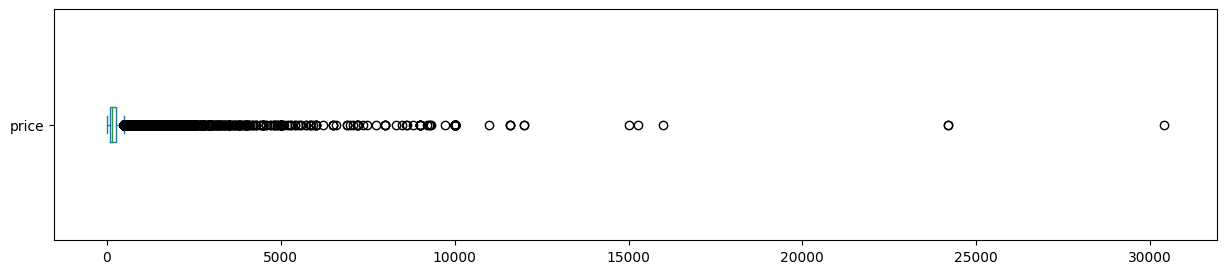

A quantidade de valores a cima de 1500 é de: 732
Equivalendo a: 0.7668052922135741 %


In [ ]:
#box splot de price
df_paris.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#procurando outliers na coluna price
print('A quantidade de valores a cima de 1500 é de:', len(df_paris[df_paris.price > 1500]))
print('Equivalendo a:', (len(df_paris[df_paris.price > 1500]) / df_paris.shape[0])*100 , '%')


Após análise percebemos que um valor de corte a cima de 1500 excluíria os outliers e não prejudicaría a análise dos dados.

In [ ]:
#remover outliers de minimum nights
df_paris_clean = df_paris.copy()
df_paris_clean.drop(df_paris_clean[df_paris_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover outliers de price
df_paris_clean.drop(df_paris_clean[df_paris.price > 1500].index, axis=0, inplace = True)

#remover neighbourhood_grup pois esta vazio
df_paris_clean.drop('neighbourhood_group', axis=1, inplace=True)

<ipython-input-29-350df9c638d2>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_paris_clean.drop(df_paris_clean[df_paris.price > 1500].index, axis=0, inplace = True)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

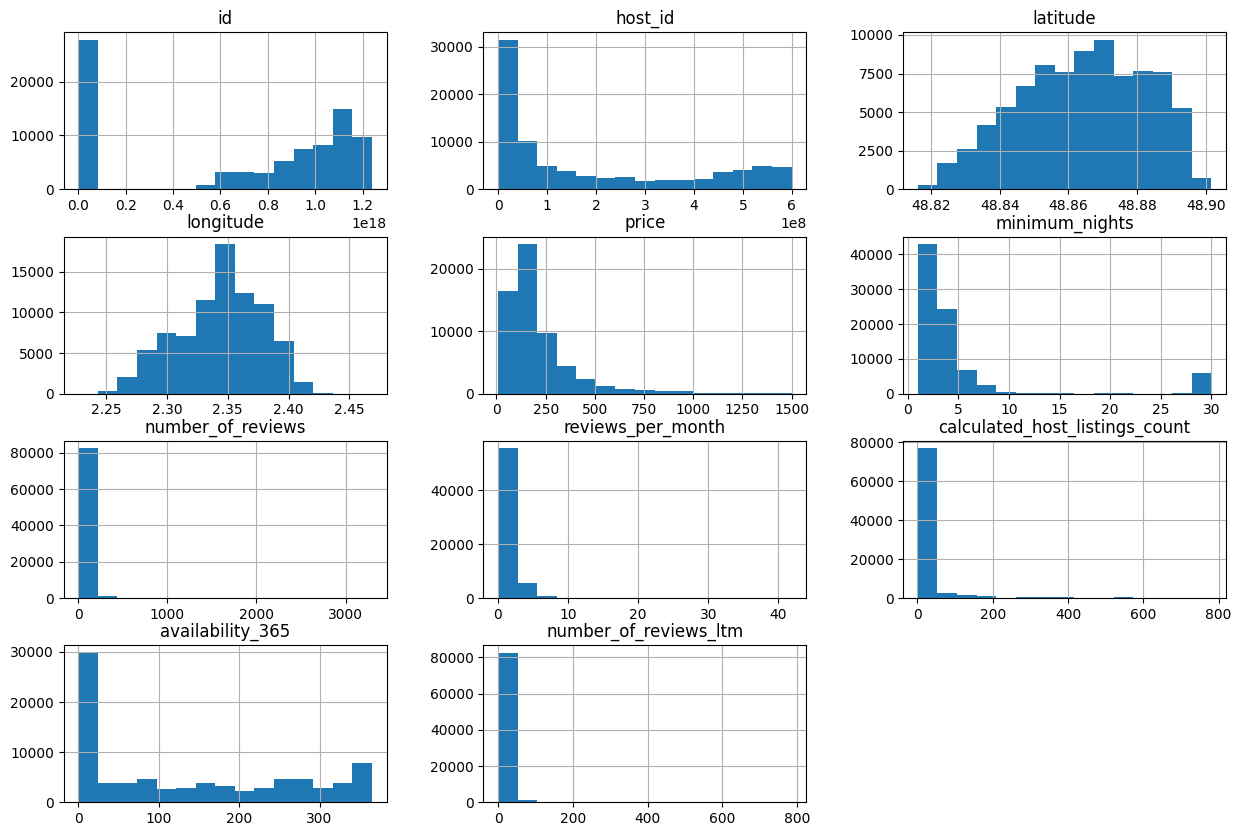

In [ ]:
#plotando os histogramas após tratamento dos dados
df_paris_clean.hist(bins=15, figsize=(15,10))

Após uma limpeza dos dados, foram retirados alguns outliers, portanto os gráficos de 'price' e 'minimum_nights' estão mais condizentes com a realidade.

In [ ]:
# criando um coluna price R$
df_paris_clean['price_BRL'] = df_paris_clean.price * 6.16


In [ ]:
df_paris_clean.price_BRL.describe()

,price_BRL
count,61082.000000
mean,1352.462883
std,1196.683887
min,49.280000
25%,634.480000
50%,954.800000
75%,1558.480000
max,9240.000000


Levando em consideração que os valores da coluna price estão em Euro, moeda utilizada em Paris. Para facilitar a análise de dados criei uma nova coluna (price_BRL) transformando os valores da coluna price em reais.

A cotação do euro na data que foi realizada esta analise é de: 1 EUR = 6.16 BRL

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price_BRL`
df_paris_clean.price_BRL.mean()

print('A média dos valores de hospedagem em paris é de: R$', df_paris_clean.price_BRL.mean().round())

A média dos valores de hospedagem em paris é de: R$ 1352.0


A média dos valores da hospedagem em paris (1352 BRL) está próxima do 75° percentil (1558.48 BRL), ou seja, isso quer dizer que a maior parte das acomodações em paris estão com os preços razoavelmente concentrados, portanto a maior parte das acomodações se encontram numa faixa próxima de preço.

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_paris_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.114609,-0.067790,-0.079408,0.010223,0.109993
minimum_nights,-0.114609,1.000000,-0.079767,-0.195936,0.142832,0.078601
number_of_reviews,-0.067790,-0.079767,1.000000,0.510411,-0.038440,0.071224
reviews_per_month,-0.079408,-0.195936,0.510411,1.000000,0.015448,0.142143
calculated_host_listings_count,0.010223,0.142832,-0.038440,0.015448,1.000000,0.083561
availability_365,0.109993,0.078601,0.071224,0.142143,0.083561,1.000000


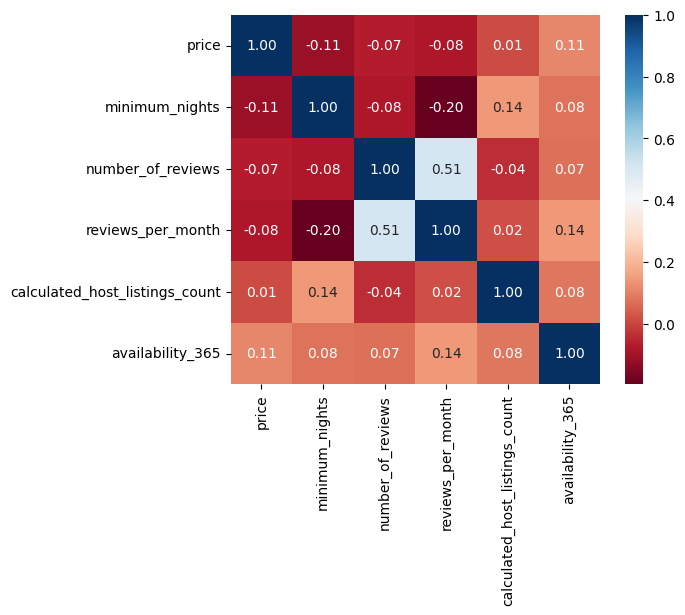

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_paris_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,73726
Private room,8952
Hotel room,685
Shared room,378


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_paris_clean.room_type.value_counts() / df_paris_clean.shape[0]

,count
room_type,
Entire home/apt,0.880405
Private room,0.106901
Hotel room,0.008180
Shared room,0.004514


As porcentagens  aproximadas de cada tipo de acomodação são: 88.04% das acomodações em Paris são imóveis inteiros, 10.70% são quartos privados, 0.81% são quartos de hotel e 0.45% são quartos  compartilhados.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_paris_clean.groupby(['neighbourhood']).price_BRL.mean().sort_values(ascending=False)

,price_BRL
neighbourhood,
Élysée,2023.929252
Palais-Bourbon,1891.348533
Passy,1814.228342
Luxembourg,1808.188210
Louvre,1800.205623
Hôtel-de-Ville,1615.471148
Temple,1467.086684
Bourse,1460.281883
Opéra,1452.521140


O bairro mais caro de Paris é Élysée com a média de preços de BRL 2023, seguindo pelos bairros Palais Bourbon e Passy, com médias de preços de BRL 1891 e BRL 1814 respectivamente.

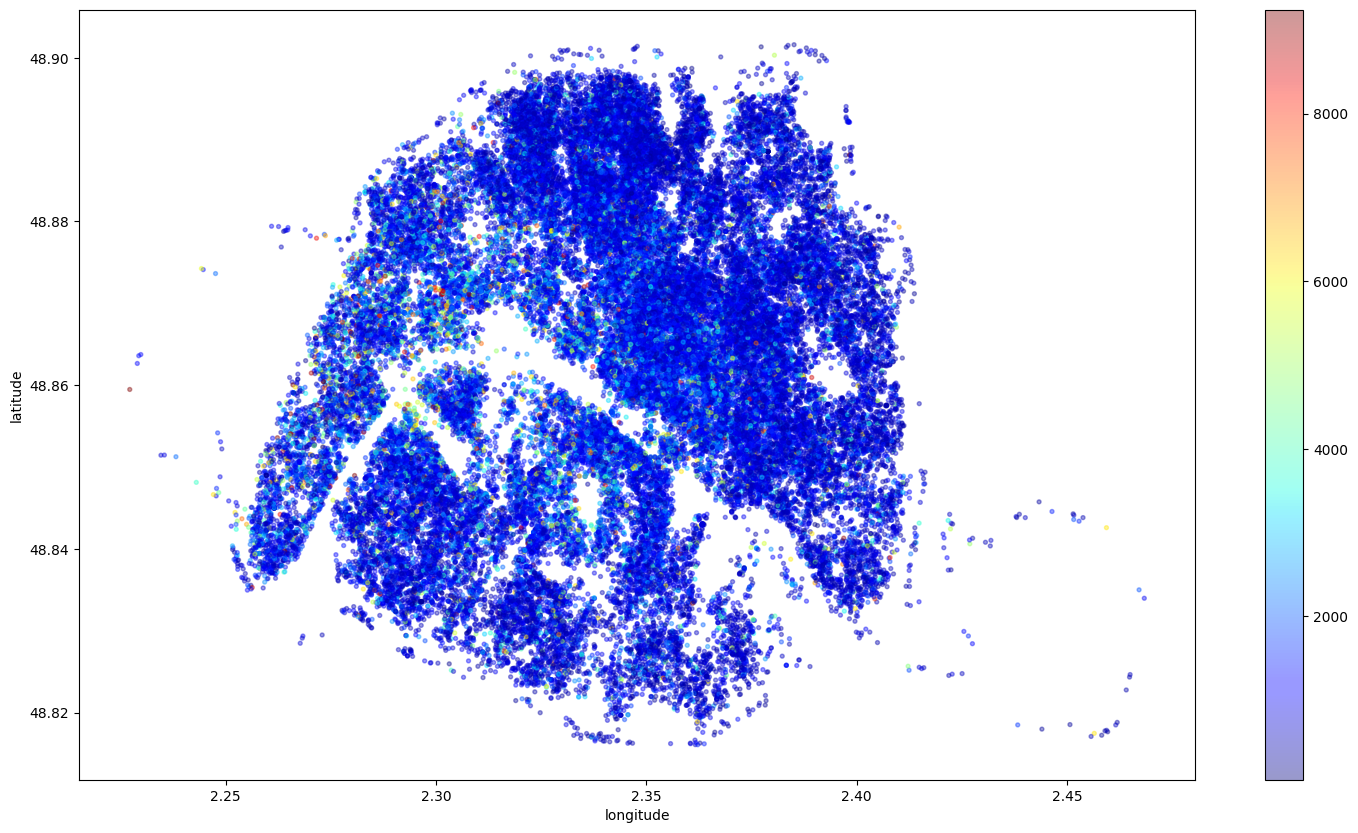

In [ ]:
# plotar os imóveis pela latitude-longitude
df_paris_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c= df_paris_clean['price_BRL'], s=8, cmap= plt.get_cmap('jet'), figsize=(18,10));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
print('A média do minimo de noites para estadia em Paris é de',df_paris_clean.minimum_nights.mean())

A média do minimo de noites para estadia em Paris é de 4.711622741548346


A média de minimo de noites para as acomodações de paris é de 5 noites.

## Conclusões


Com base na análise de dados dos apartamentos disponíveis para alugar em paris, podemos concluir que o mercado de locação na cidade de paris é bastante diversificado em termos de valores e tipos de hospedagem. A média dos preços de hospedagem é de 1352.00 reais, o que indica uma oferta ampla de opções acessíveis para um público variado. No entanto, há uma grande variação de valores, com eles indo de 49.28 reais até 9240.00 reais, refletindo a diferença nos bairros e tipos de imóveis.

A distribuição dos preços aponta que 50% dos apartamentos tem valores de 954 reais, enquanto 75% dos preços ficam abaixo de 1558 reais. Isso sugere que, apesar de haver apartamentos de alto custo, existe uma boa oferta de imóveis em faixas de preços mais acessíveis, como podemos ver no Heatmap onde temos apartamentos de baixo baixo custo em todas as localidades de Paris. O bairro de Élysée se destaca se destaca como a localidade mais cara, com média de preços de 2023 reais, seguida por Palais Bourbon e Passy com média de preços de 1891 reais e 1814 reais. Esses bairros são os mais luxuosos e demandam preços mais  elevados, provavelmente por sua localização e prestígio.

Quanto aos tipos de apartamentos ofertados, os apartamentos inteiros dominam o mercado, representando aproximadamente 88% dos tipos de apartamentos, o que demonstra que a maioria dos hóspedes preferem privacidade e espaços completos. Quartos privados são a segunda opção mais popular com 10% dos tipos de apartamentos disponíveis para locação.

Por fim, o mínino de noites para aluguel em Paris tem média de 5 noites, isso sugere que o mercado parisiense é voltado para estadias de curta e média duração, como foco em turistas e profissionais que desejam passar um tempo mais limitado na cidade, sem a necessidade de comprometer-se com longos períodos de locação.

Em conclusão, o mercado de aluguel de apartamentos em paris oferece uma ampla gama de preços e opções, com grande destaque para áreas mais caras e apartametos luxuosos e a preferência por apartamentos inteiros. O alto valor de algumas localidades reflete a demanda por bairros prestigiados, mas ainda há uma diversidade de preços que atende tanto a orçamentos mais restritos quanto a públicos que procuram luxo.

